In [ ]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly,
## this block should return the first two rows of the customers table
from sqlalchemy import create_engine
from sqlalchemy import text
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

with engine.begin() as connection:
    connection.execute(text("SELECT * FROM customers LIMIT 2;")).fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


## Scenario 

You are a team of highly skilled data scientists at a leading automotive company. Your boss needs comprehensive sales data analysis to present at the upcoming company shareholder meeting. She has sent you the following e-mail with specific requests for insights.

***
From: importantboss@leadingautomotivecompany.com

To: datascienceteam@leadingautomotivecompany.com

Subject: Data Analysis for Shareholder Meeting

For our upcoming shareholder meeting, we need to provide detailed insights into our sales performance across states, dealerships, and sales channels. Please compile the requested information and send me the summary tables, visualizations, and your thoughts on each section.

1. **State-Level Sales Performance**: Provide insights into sales performance for the top 5 states with the highest sales for the "Lemon" model and the bottom 5 states with the lowest sales for the "Model Chi."

2. **Cumulative Sales at Dealerships**: For models that have finished production, analyze cumulative sales data over time specifically for dealership sales. This should include overall trends in sales for these end-of-production models.

3. **Sales Distribution by Product Category and Channel**: Examine how the distribution of sales amounts and number of transactions varies by product category, channel, and year for transactions above a certain threshold. Include comparisons across different price categories and transaction years.

Thank you for your hard work in preparing these insights!

-Important Boss
***


**Your team promptly comes up with the following plan.**

## Part 1: Analyzing Model Sales Performance by State During Seasonal Promotion

1. Write a SQL query that retrieves the total sales amount for each car model sold in each state during the 2015 Fourth of July to Halloween promotional period. The table should include three columns: `state`, `model`, and `total_sales`, with each row representing a unique model-state combination. Sales should be attributed to the **state where the purchasing customer resides**. Ensure the `total_sales` amounts are calculated correctly and displayed in descending order of total sales for each state, with states listed in alphabetical order.

2. Use SQLAlchemy to execute the query and save the results to a pandas DataFrame called `model_sales_by_state`.

3. In Python, filter `model_sales_by_state` for the **top 5 states with the highest total sales for the "Lemon" model**, ordered by `total_sales` in descending order. Store this result in a DataFrame named `top_lemon_sales`.

4. In Python, filter `model_sales_by_state` for the **bottom 5 states with the lowest total sales for the "Model Chi" model**, ordered by `total_sales` in ascending order. Store this result in a DataFrame named `bottom_chi_sales`.

5. Create presentation-ready visualizations for model sales performance by state, with the following specific requirements:
   - **Visualize the top 5 states with the highest total sales in Lemon models** (in descending order).
   - **Visualize the bottom 5 states with the lowest total sales in Model Chi models** (in ascending order).
   
   Include appropriate titles, labels, and any necessary clarifications for easy interpretation. Avoid clutter by simplifying axis labels, and ensure the date range (July 4 - October 31, 2015) is clearly indicated.

Include code for each component of Part 1 in the designated code blocks below.


### Part 1: Solution

In [ ]:
# 1.1 Create the SQL Query
# Q1: List the total amount of sales of each model sold in each state from our 4th of July sale to Halloween in 2015.
# Order them based on descending order of total sales and by alphabetically ordered states.

query_part1 = """
SELECT 
    c.state,
    p.model,
    SUM(s.sales_amount) AS total_sales
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
JOIN products p ON s.product_id = p.product_id
WHERE s.sales_transaction_date >= '2015-07-04' 
  AND s.sales_transaction_date <= '2015-10-31'
GROUP BY c.state, p.model
ORDER BY c.state ASC, total_sales DESC
"""

In [ ]:
# 1.2 Create the data frame
with engine.begin() as connection:
    model_sales_by_state = pd.read_sql(text(query_part1), connection)

model_sales_by_state.head(10) #display first 10 queries from the dataframe

,state,model,total_sales
0,AK,Model Sigma,65500.000
1,AK,Lemon,2999.940
2,AL,Model Sigma,255450.000
3,AL,Lemon,17449.651
4,AR,Lemon,1899.962
5,AZ,Model Sigma,117900.000
6,AZ,Lemon,8549.829
7,CA,Model Chi,1242000.000
8,CA,Model Sigma,727050.000
9,CA,Lemon,57098.858


In [ ]:
#1.3 
# Filter for Lemon models, remove None states, and sort by total_sales in descending order
top_lemon_sales = model_sales_by_state[
    (model_sales_by_state['model'] == 'Lemon') & 
    (model_sales_by_state['state'].notna())
].nlargest(5, 'total_sales')
print("Top 5 states with highest Lemon sales (descending order):")
top_lemon_sales

# Filter for Model Chi, remove None states, and sort by total_sales in ascending order
bottom_chi_sales = model_sales_by_state[
    (model_sales_by_state['model'] == 'Model Chi') & 
    (model_sales_by_state['state'].notna())
].nsmallest(5, 'total_sales')
print("\nBottom 5 states with lowest Model Chi sales (ascending order):")
bottom_chi_sales

Top 5 states with highest Lemon sales:


,state,model,total_sales
9,CA,Lemon,57098.858
91,TX,Lemon,55448.891
21,FL,Lemon,44799.104
71,NY,Lemon,35249.295
96,VA,Lemon,24199.516



Bottom 5 states with lowest Model Chi sales:


,state,model,total_sales
56,MS,Model Chi,103500.0
66,NM,Model Chi,103500.0
84,SD,Model Chi,103500.0
13,CT,Model Chi,115000.0
26,IA,Model Chi,115000.0


<BarContainer object of 5 artists>

Text(0.5, 0, 'Total Sales ($)')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Top 5 States - Highest Lemon Model Sales\n(July 4 - October 31, 2015)')

Text(57098.85799999997, 0, ' $57,099')

Text(55448.89099999997, 1, ' $55,449')

Text(44799.10400000002, 2, ' $44,799')

Text(35249.29500000002, 3, ' $35,249')

Text(24199.516000000014, 4, ' $24,200')

<BarContainer object of 5 artists>

Text(0.5, 0, 'Total Sales ($)')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Bottom 5 States - Lowest Model Chi Sales\n(July 4 - October 31, 2015)')

Text(103500.0, 0, ' $103,500')

Text(103500.0, 1, ' $103,500')

Text(103500.0, 2, ' $103,500')

Text(115000.0, 3, ' $115,000')

Text(115000.0, 4, ' $115,000')

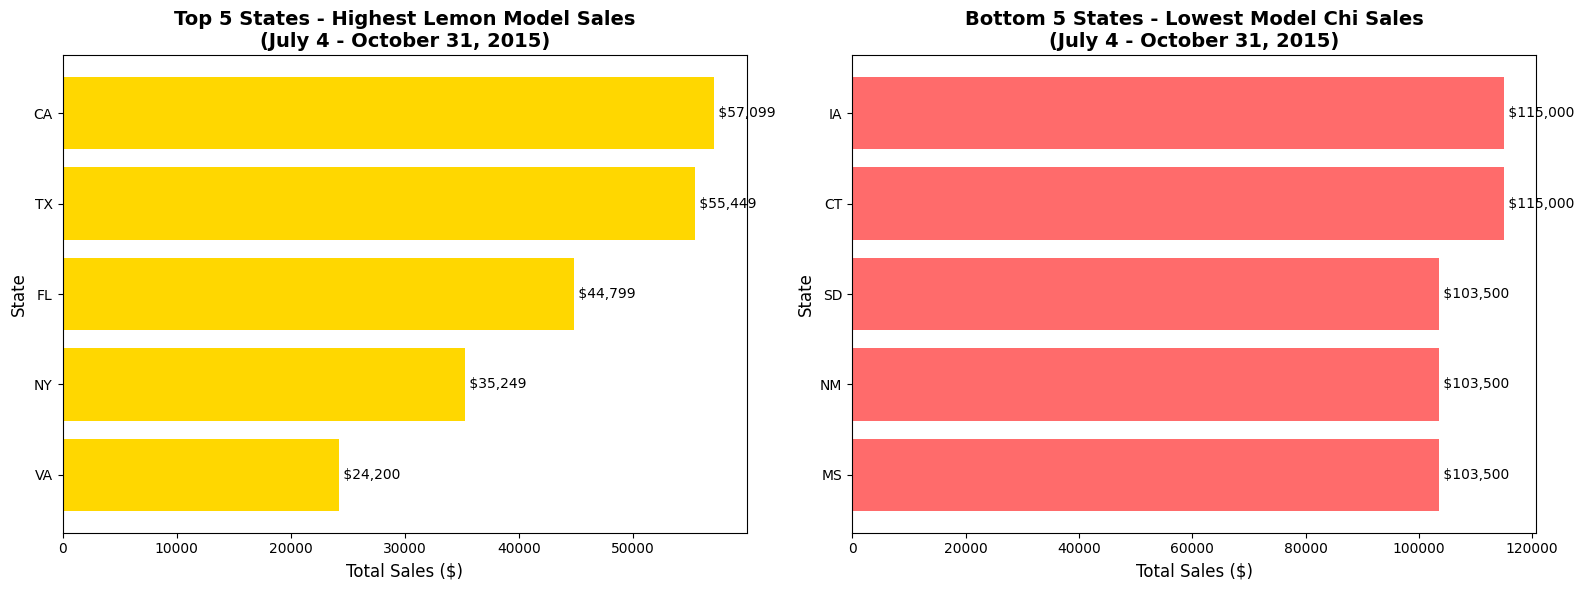

In [ ]:
# 1.4 Plotting
## Visualizing the top 5 states with the highest total sales in Lemon models (DESC)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 5 Lemon Sales
axes[0].barh(top_lemon_sales['state'], top_lemon_sales['total_sales'], color='#FFD700') 
axes[0].set_xlabel('Total Sales ($)', fontsize=12)
axes[0].set_ylabel('State', fontsize=12)
axes[0].set_title('Top 5 States - Highest Lemon Model Sales\n(July 4 2015 - October 31, 2015)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()  # Highest at top
for i, v in enumerate(top_lemon_sales['total_sales']):
    axes[0].text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

## Visualize the bottom 5 states with the lowest total sales in Model Chi models (ASC)
axes[1].barh(bottom_chi_sales['state'], bottom_chi_sales['total_sales'], color='#FF6B6B')
axes[1].set_xlabel('Total Sales ($)', fontsize=12)
axes[1].set_ylabel('State', fontsize=12)
axes[1].set_title('Bottom 5 States - Lowest Model Chi Sales\n(July 4 2015 - October 31, 2015)', fontsize=14, fontweight='bold')
for i, v in enumerate(bottom_chi_sales['total_sales']):
    axes[1].text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Part 2: Cumulative Sales Analysis for End-Production Models at Dealerships

Analyze the cumulative sales of products sold at dealerships (excluding online sales) for models that have completed production. For this task, you will examine the total number of sales from the first sale date of each model to its last recorded sale date. Follow the steps below to complete this analysis:

1. Write a SQL query to retrieve cumulative sales data for each model (you may want to use a common table expression). Your query should:
   - Include the columns: `model`, `model_year` (as the production year), `product_type`, `sales_transaction_date`, and `total_daily_sales`, where `total_daily_sales` represents the total sales amount for each unique `sales_transaction_date`.
   - Filter for dealership sales only (i.e., sales from the **dealership** channel, excluding online sales) and include only products with a **non-null production end date** to capture models that are no longer in production.
   - Use a window function to calculate `cumulative_sales` as the cumulative total of `total_daily_sales` for each model-year, ordered by `sales_transaction_date`. 

2. Use SQLAlchemy to execute the query and save the results to a pandas DataFrame named `cumulative_sales_dealership`.

3. In your DataFrame, create a new column called `model_and_year` that combines the `model` and `model_year` columns for labeling purposes in the plot.

4. Visualize the cumulative sales over time for each model that has finished production *in a single plot* (*hint*: seaborn). The plot should include:
   - A line for each unique combination of `model` and `model_year`, differentiated in the plot legend by `model_and_year`.

Ensure the visualization is **presentation ready**, with appropriate and clear titles, labels, and other formatting to make it easy to interpret. Replace technical names such as `model_year` and `sales_transaction_date` with more user-friendly terms like "Year" and "Date" where applicable.

Include the code for each component of Part 2 in the designated code blocks below.


### Part 2: Solution

In [ ]:
# 2.1 Create the SQL Query
# Q2: Find the total number of sales for the products sold at dealerships (not online) that have
# had their production finished from the product's start first sale to its last sale date.

query_part2 = """
WITH daily_sales AS (
    SELECT 
        p.model,
        p.year AS model_year,
        p.product_type,
        s.sales_transaction_date,
        SUM(s.sales_amount) AS total_daily_sales
    FROM sales s
    JOIN products p ON s.product_id = p.product_id
    WHERE s.channel = 'dealership'
      AND p.production_end_date IS NOT NULL
    GROUP BY p.model, p.year, p.product_type, s.sales_transaction_date
)
SELECT 
    model,
    model_year,
    product_type,
    sales_transaction_date,
    total_daily_sales,
    SUM(total_daily_sales) OVER (
        PARTITION BY model, model_year 
        ORDER BY sales_transaction_date
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS cumulative_sales
FROM daily_sales
ORDER BY model, model_year, sales_transaction_date
"""

In [ ]:
# 2.2 create the data frame
with engine.begin() as connection:
    cumulative_sales_dealership = pd.read_sql(text(query_part2), connection)

cumulative_sales_dealership.head(10) #display first 10 rows of cumulative sales

,model,model_year,product_type,sales_transaction_date,total_daily_sales,cumulative_sales
0,Blade,2014,scooter,2014-06-26 01:23:25,699.990,699.990
1,Blade,2014,scooter,2014-06-26 03:10:29,559.992,1259.982
2,Blade,2014,scooter,2014-06-27 23:30:35,629.991,1889.973
3,Blade,2014,scooter,2014-06-29 12:23:30,699.990,2589.963
4,Blade,2014,scooter,2014-07-01 17:21:55,629.991,3219.954
5,Blade,2014,scooter,2014-07-06 11:34:01,699.990,3919.944
6,Blade,2014,scooter,2014-07-07 10:58:02,629.991,4549.935
7,Blade,2014,scooter,2014-07-11 07:42:56,699.990,5249.925
8,Blade,2014,scooter,2014-07-11 09:00:05,699.990,5949.915
9,Blade,2014,scooter,2014-07-14 03:43:10,699.990,6649.905


In [ ]:
# 2.3 combine model and year for labeling purposes
cumulative_sales_dealership['model_and_year'] = (
    cumulative_sales_dealership['model'] + ' (' + 
    cumulative_sales_dealership['model_year'].astype(str) + ')'
)

cumulative_sales_dealership.head()

,model,model_year,product_type,sales_transaction_date,total_daily_sales,cumulative_sales,model_and_year
0,Blade,2014,scooter,2014-06-26 01:23:25,699.990,699.990,Blade (2014)
1,Blade,2014,scooter,2014-06-26 03:10:29,559.992,1259.982,Blade (2014)
2,Blade,2014,scooter,2014-06-27 23:30:35,629.991,1889.973,Blade (2014)
3,Blade,2014,scooter,2014-06-29 12:23:30,699.990,2589.963,Blade (2014)
4,Blade,2014,scooter,2014-07-01 17:21:55,629.991,3219.954,Blade (2014)


<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='sales_transaction_date', ylabel='cumulative_sales'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Cumulative Sales ($)')

Text(0.5, 1.0, 'Cumulative Sales Over Time for End-Production Models at Dealerships')

(array([16436., 16801., 17167., 17532., 17897.]),
 [Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019')])

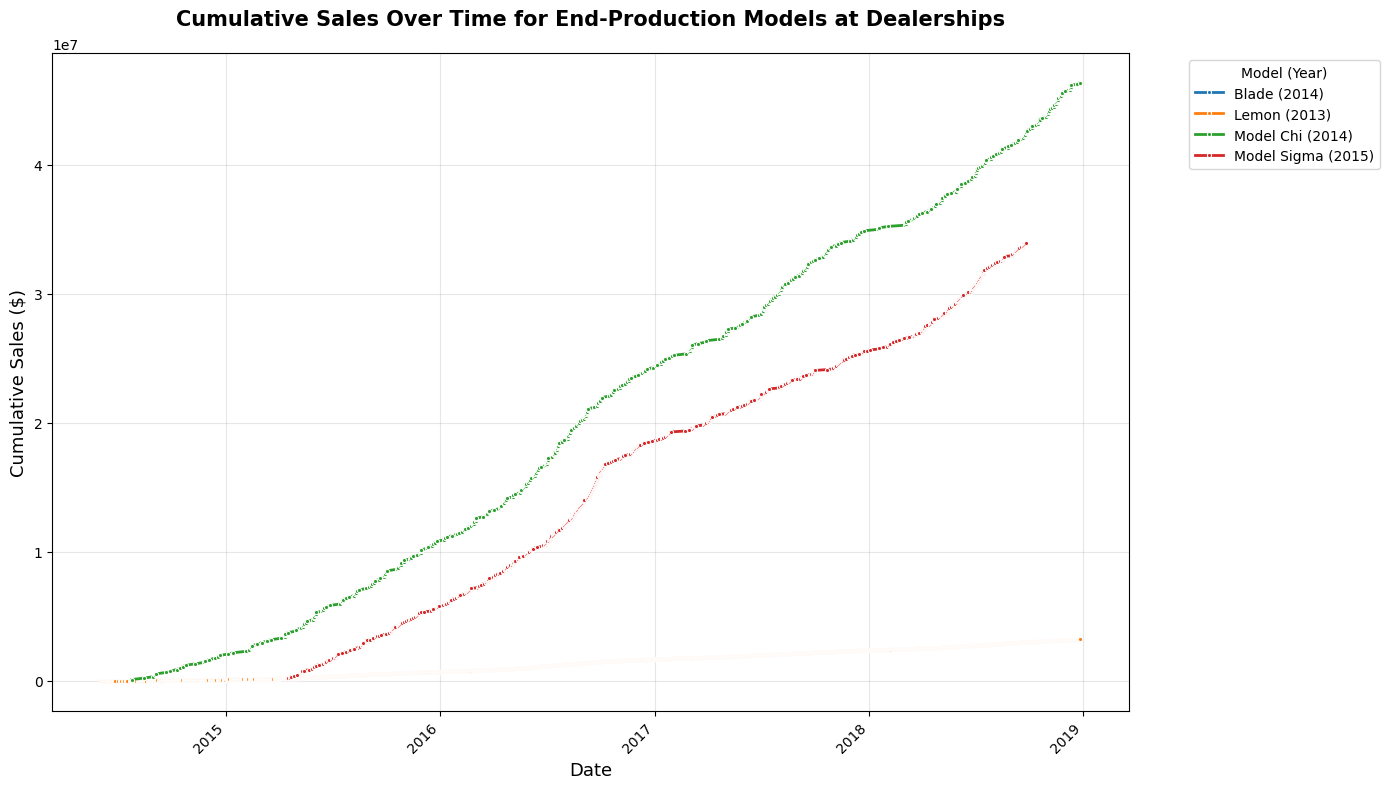

In [ ]:
# 2.4 Plotting
plt.figure(figsize=(14, 8))

# Use seaborn lineplot for cleaner visualization
sns.lineplot(
    data=cumulative_sales_dealership,
    x='sales_transaction_date',
    y='cumulative_sales',
    hue='model_and_year',
    marker='o',
    markersize=3,
    linewidth=2
)

plt.xlabel('Date', fontsize=13)
plt.ylabel('Cumulative Sales ($)', fontsize=13)
plt.title('Cumulative Sales Over Time for End-Production Models at Dealerships', 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Model (Year)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 3: Sales Analysis by Product and Transaction Channel

Create tables and visualizations to compare the sales distribution by product category and sales channel for sales made on or after January 1, 2017, and before January 1, 2020. Only include sales where the transaction amount exceeds a minimum threshold of 5000. Follow the steps below to complete the analysis:

1. **Query**: Write a `SELECT` query that retrieves sales with a transaction date on or after January 1, 2017, and before January 1, 2020, from the `sales` table. Filter the sales data to only include transactions where the `sales_amount` is greater than 5000. Join this data with the `customers` table and retain only customers that reside in cities that have at least one dealership (you may want to use a common table expression for this). Your query should return the following columns:

   - `product_id`: as in the sales table.
   - `channel`: as in the sales table.
   - `sales_amount`: as in the sales table.
   - `price_category`: a derived categorical field based on `sales_amount`:
      - `Premium` for `sales_amount` above 50000.
      - `Standard` for `sales_amount` between 10000 and 50000.
      - `Basic` for `sales_amount` below 10000.
   - `transaction_year`: the year extracted from the `sales_transaction_date`.

2. **SQLAlchemy**: Use SQLAlchemy to execute the query and store the results in a Pandas DataFrame called `city_sales_analysis`.

3. **Visualization**: To thoroughly analyze sales patterns, create multiple sets of plots:

   - **Total Sales Year over Year**: For each combination of `product_id` and `price_category`, create a plot that shows the total `sales_amount` for each `transaction_year` (2017, 2018, and 2019). For instance, one plot will display total sales for "Premium" products in 2017, 2018, and 2019 across all channels.
   
   - **Transaction Counts by Channel**: For each combination of `channel` and `price_category`, create a plot comparing the distribution of number of transactions by `transaction_year`. This constitutes a superimposition of the distribution of number of transactions for each year (2017, 2018, and 2019). Arrange these plots to allow clear comparisons across channels and categories.

   - Use **seaborn's FacetGrid** or a similar library feature to organize plots in a grid, making it easy to observe variations by `product_id`, `channel`, and `price_category`.

   - Ensure each plot is **presentation-ready**, with complete and clear titles, labels, and legends. Replace technical terms like `transaction_year` with user-friendly labels like "Year" and "Sales Amount". Rotate x-axis labels for clarity, avoid overlapping labels, and keep axis scaling consistent for comparability across plots


### Part 3: Solution 

In [ ]:
#3.1 query to select and sort the relavent data
query_part3 = """
WITH cities_with_dealerships AS ( 
    SELECT DISTINCT city
    FROM dealerships
)
SELECT 
    s.product_id,
    s.channel,
    s.sales_amount,
    CASE 
        WHEN s.sales_amount > 50000 THEN 'Premium'
        WHEN s.sales_amount BETWEEN 10000 AND 50000 THEN 'Standard'
        ELSE 'Basic'
    END AS price_category,
    EXTRACT(YEAR FROM s.sales_transaction_date) AS transaction_year
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
WHERE s.sales_transaction_date >= '2017-01-01'
  AND s.sales_transaction_date < '2020-01-01'
  AND s.sales_amount > 5000
  AND c.city IN (SELECT city FROM cities_with_dealerships)
ORDER BY s.product_id, s.channel, transaction_year
"""

In [ ]:
#3.2 store results
with engine.begin() as connection:
    city_sales_analysis = pd.read_sql(text(query_part3), connection)

# Convert transaction_year to integer for cleaner display
city_sales_analysis['transaction_year'] = city_sales_analysis['transaction_year'].astype(int)

print(f"Total rows: {len(city_sales_analysis)}")
city_sales_analysis.head(10) #Display only the first ten rows.

Total rows: 312


,product_id,channel,sales_amount,price_category,transaction_year
0,4,dealership,115000.0,Premium,2017
1,4,dealership,103500.0,Premium,2017
2,4,dealership,92000.0,Premium,2017
3,4,dealership,115000.0,Premium,2017
4,4,dealership,103500.0,Premium,2017
5,4,dealership,115000.0,Premium,2017
6,4,dealership,115000.0,Premium,2017
7,4,dealership,103500.0,Premium,2017
8,4,dealership,115000.0,Premium,2017
9,4,dealership,115000.0,Premium,2017


/usr/local/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

Text(0.5, 1.02, 'Total Sales Amount Year over Year by Product ID and Price Category')

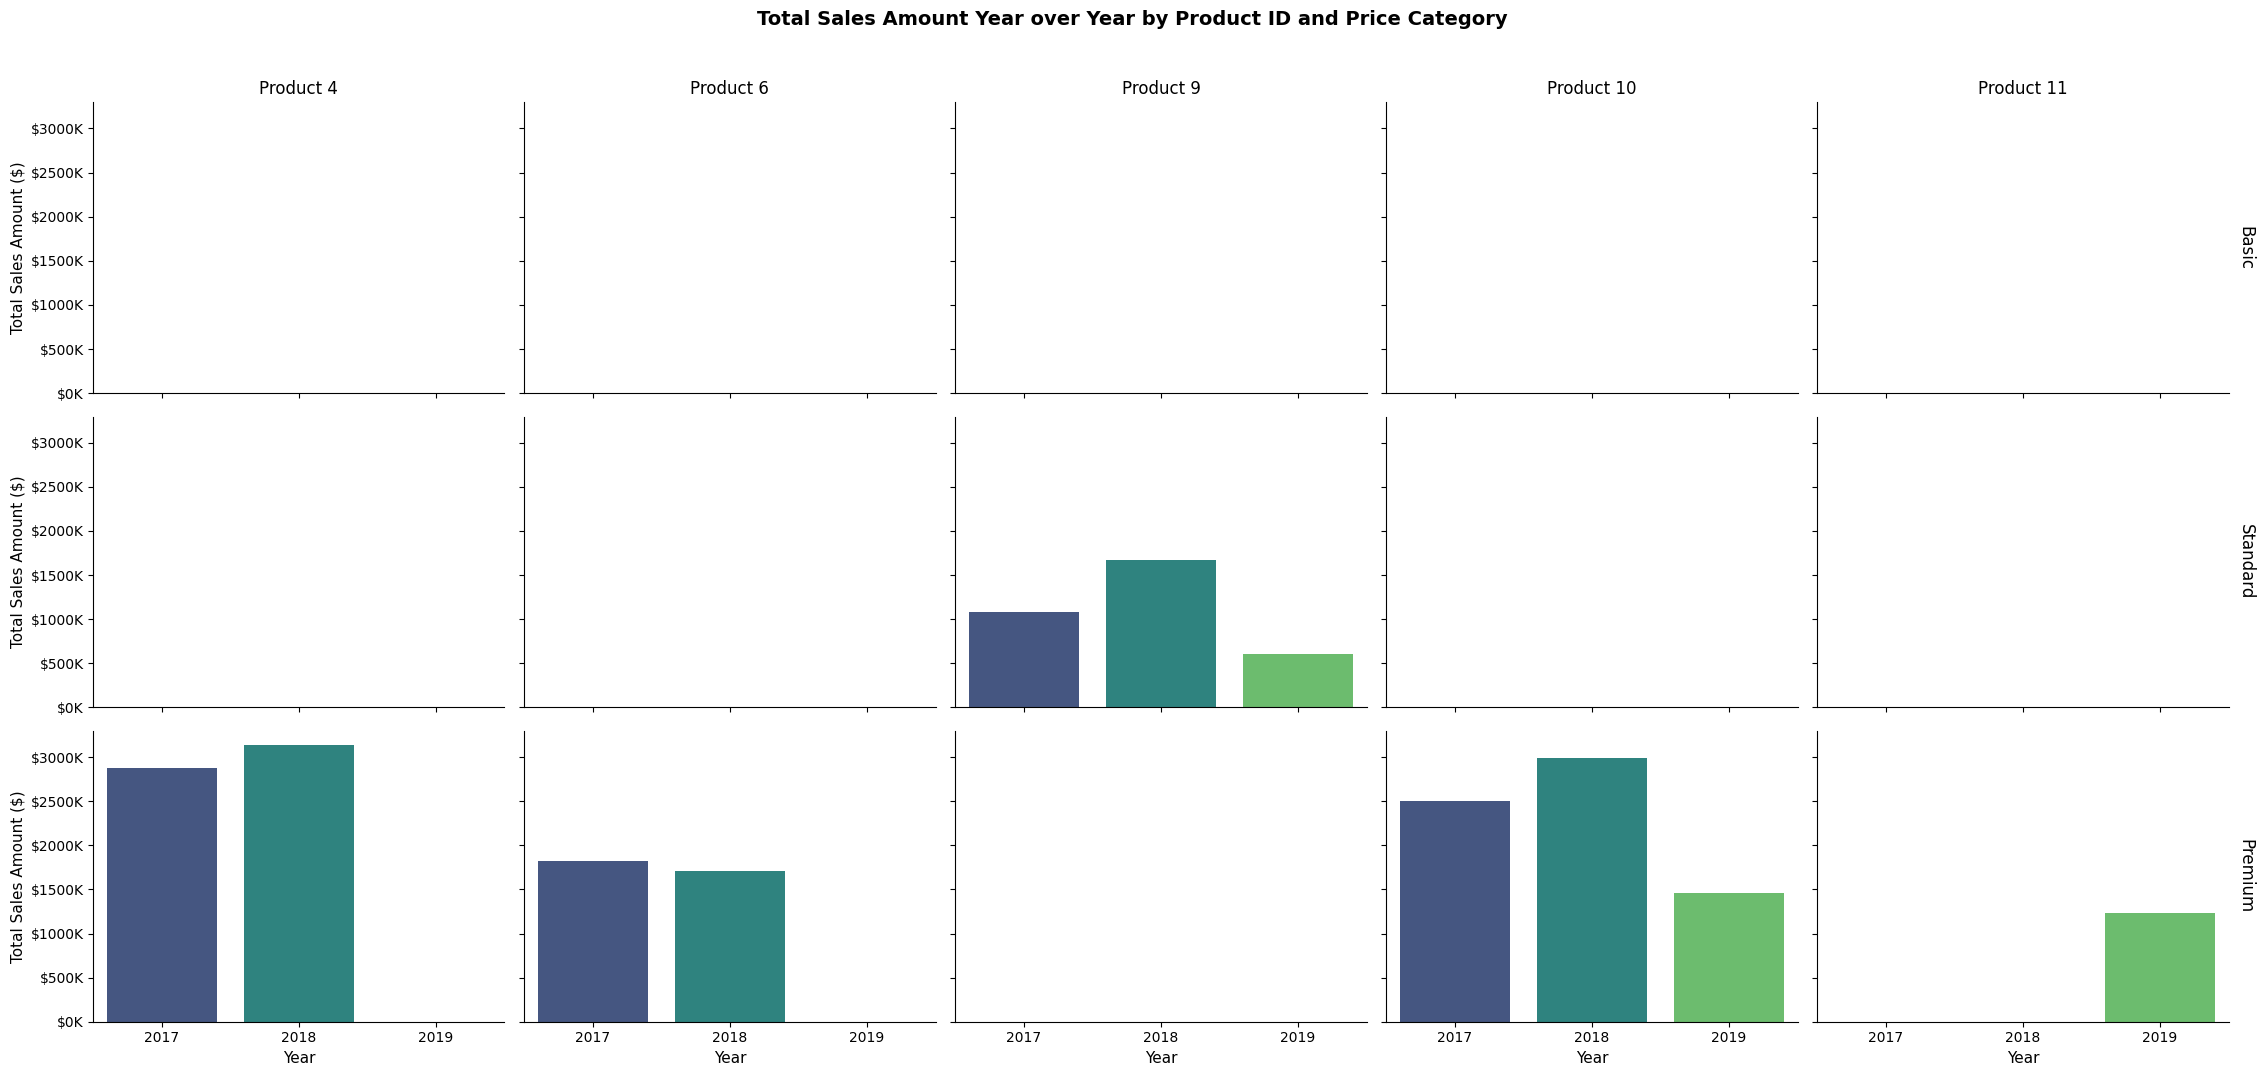

In [ ]:
# 3.3 visualize Total Sales Amount Year over Year by Product ID and Price Category

# Aggregate total sales by product_id, price_category, and transaction_year
sales_by_product_category = city_sales_analysis.groupby(
    ['product_id', 'price_category', 'transaction_year']
)['sales_amount'].sum().reset_index()

# Define price category order for consistent display
price_order = ['Basic', 'Standard', 'Premium']
sales_by_product_category['price_category'] = pd.Categorical(
    sales_by_product_category['price_category'], 
    categories=price_order, 
    ordered=True
)

# Create FacetGrid using seaborn
g = sns.FacetGrid(
    sales_by_product_category, 
    col='product_id', 
    row='price_category',
    height=3.5, 
    aspect=1.3,
    margin_titles=True
)
#create plots within FacetGrid
g.map_dataframe(
    sns.barplot, 
    x='transaction_year', 
    y='sales_amount',
    palette='viridis',
    order=[2017, 2018, 2019]
)

g.set_axis_labels('Year', 'Total Sales Amount ($)', fontsize=11)
g.set_titles(col_template='Product {col_name}', row_template='{row_name}', size=12)
g.fig.suptitle('Total Sales Amount Year over Year by Product ID and Price Category', 
               fontsize=14, fontweight='bold', y=1.02)

# Rotate x-axis labels for clarity and readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=0)
    # Format y-axis as currency
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout() #Make it so you can see the graphs and they are proportioned well.
plt.show()

Text(0.5, 1.02, 'Transaction Count Distribution by Channel and Price Category (2017-2019)')

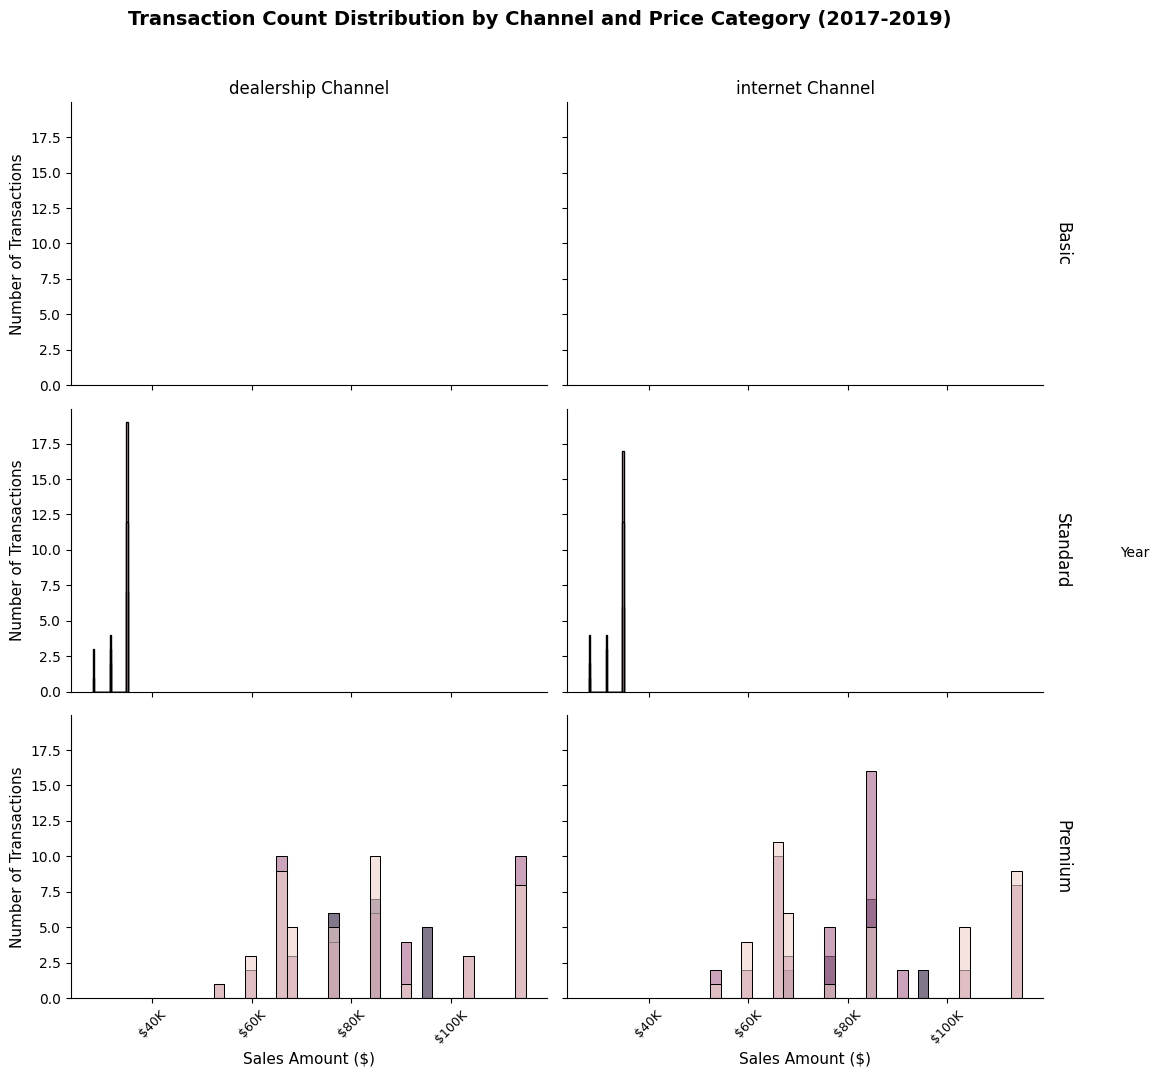

In [ ]:
# 3.3 visualize Number of Transactions by Channel and Price Category

# Ensure price_category is categorical with correct order
city_sales_analysis['price_category'] = pd.Categorical(
    city_sales_analysis['price_category'], 
    categories=['Basic', 'Standard', 'Premium'], 
    ordered=True
)

# Create FacetGrid for distribution plots
g2 = sns.FacetGrid(
    city_sales_analysis,
    col='channel',
    row='price_category',
    height=3.5,
    aspect=1.5,
    margin_titles=True
)

# Plot histograms with overlay for each year
g2.map(
    sns.histplot,
    'sales_amount',
    hue=city_sales_analysis['transaction_year'],
    bins=30,
    alpha=0.6,
    kde=False,
    multiple='layer'
)

g2.set_axis_labels('Sales Amount ($)', 'Number of Transactions', fontsize=11)
g2.set_titles(col_template='{col_name} Channel', row_template='{row_name}', size=12)
g2.fig.suptitle('Transaction Count Distribution by Channel and Price Category (2017-2019)', 
                fontsize=14, fontweight='bold', y=1.02)

# Add legend to increase reability
g2.add_legend(title='Year', bbox_to_anchor=(1.02, 0.5), loc='center left')

# Format x-axis to increase figure readability
for ax in g2.axes.flat:
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()